In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('data/data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [76]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [77]:
df = df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [78]:
# drop id column
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [79]:
# encode
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encode_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def encode(columns, df):
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

df = encode(encode_col, df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


[Text(0.5, 0, 'gender'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'hypertension'),
 Text(3.5, 0, 'heart_disease'),
 Text(4.5, 0, 'ever_married'),
 Text(5.5, 0, 'work_type'),
 Text(6.5, 0, 'Residence_type'),
 Text(7.5, 0, 'avg_glucose_level'),
 Text(8.5, 0, 'bmi'),
 Text(9.5, 0, 'smoking_status'),
 Text(10.5, 0, 'stroke')]

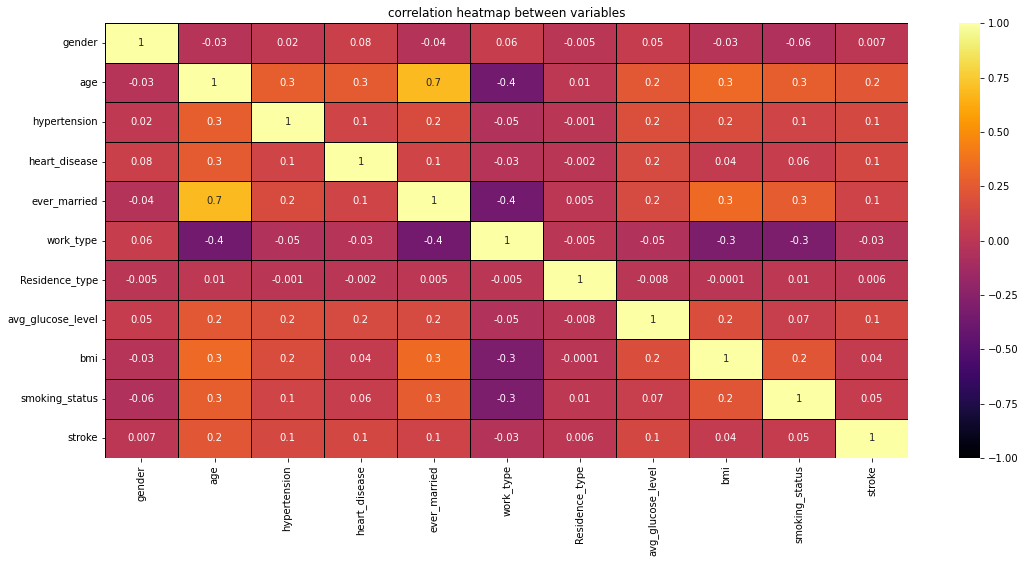

In [80]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import pickle

In [82]:
columns = list(df.columns)
columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [96]:
x_col = columns[0:len(columns)-1]
y_col = columns[len(columns)-1]
y_col, x_col

('stroke',
 ['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'])

In [97]:
x = df[x_col]
y = df[y_col]

In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
# models
models = []

In [100]:
# gaussiannb
pipe = Pipeline([('gnb',GaussianNB())])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
gnb_score = accuracy_score(ytest,ypred)

location = 'models/gnb.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"gnb",
        "accuracy":gnb_score,
        "location":location
    }
)

gnb_score

0.8689748811948405

In [101]:
# decisiontree
pipe = Pipeline([('dt',DecisionTreeClassifier())])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
dt_score = accuracy_score(ytest,ypred)

location = 'models/dt.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"decision tree",
        "accuracy":dt_score,
        "location":location
    }
)

dt_score

0.9035980991174474

In [102]:
# svm
pipe = Pipeline([('svm',svm.SVC(kernel='linear'))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
svm_score = accuracy_score(ytest,ypred)

location = 'models/svm.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"svm",
        "accuracy":svm_score,
        "location":location
    }
)

svm_score

0.9511201629327902

In [103]:
# knn
pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=5))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
knn_score = accuracy_score(ytest,ypred)

location = 'models/knn.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"knn",
        "accuracy":knn_score,
        "location":location
    }
)

knn_score

0.9477257298031229

In [104]:
# lr
pipe = Pipeline([('lr',LogisticRegression(random_state=42))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
lr_score = accuracy_score(ytest,ypred)

location = 'models/lr.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"linear regression",
        "accuracy":lr_score,
        "location":location
    }
)

lr_score

F:\Setup\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9511201629327902

In [105]:
import json

with open("results/models.json", "w") as outfile:
    json.dump(models, outfile)